In [23]:
#This notebook will visualize the preliminary results from some of the data. 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import imageio
from PIL import Image
import json
from scipy import stats



### Gifs

In [2]:
#At first we are going to generate a gif with the figures coming from the phi_k analysis.
#We are going to use the following libraries

#Importing images. The name of the images is in format "phi_k_DS_epsilon_0.1.png", where the 0.1 indicates the value of epsilon.
#We are going to import the images and sort them by the value of epsilon.
path="Project/DataSets/Data_Adult/AIM_samples/phik_DS/"
images = []
for filename in os.listdir(path):
    if filename.endswith('.png'):
        images.append(filename)
        
images.sort(key=lambda x: float(x.split('_')[-1].split('.png')[0]))
images = [path + i for i in images]

# #Creating the gif with 5 seconds per image
kargs = { 'duration': 1500 }
gif_path = path+ 'phi_k_DS.gif'
with imageio.get_writer(gif_path,  **kargs) as writer:
    for filename in images:
        image = imageio.imread(filename)
        writer.append_data(image)

### Epsilon plots from jsons

In [3]:
# Importing dfs from every model, coming from a json file

def load_metrics(samples_folder):
    metrics = {}
    for filename in filenames:
        with open(f"Project/DataSets/Data_Adult/{samples_folder}/results_{filename}.json") as f:
            metrics[filename] = json.load(f)
    return metrics

# Define the filenames
filenames = [
    "delta_c",
    "delta_r",
    "delta_t",
    "gepsilon",
    "mu"
]

# Load metrics for each sampling method
metrics_aim = load_metrics("AIM_samples")
metrics_dpctgan = load_metrics("DPCTGAN_samples")
metrics_pategan = load_metrics("PATEGAN_samples")
metrics_patctgan = load_metrics("PATECTGAN_samples")
metrics_mst = load_metrics("MST_samples")
metrics_dpgan= load_metrics("DPGAN_samples")

In [4]:
#Making a dataframe for every metric. pd_egpsilon is the dataframe for epsilon, pd_mu is the dataframe for mu, etc.
#The index is going to be the value of epsilon, and the columns are going to be the metrics for every model.
pd_epsilon = pd.DataFrame()
pd_mu = pd.DataFrame()
pd_delta_c = pd.DataFrame()
pd_delta_r = pd.DataFrame()
pd_delta_t = pd.DataFrame()

for key in filenames:
    if key == 'gepsilon':
        pd_epsilon['AIM'] = np.array(list(metrics_aim[key].values()))
        pd_epsilon['DPCTGAN'] =np.array(list( metrics_dpctgan[key].values()))
        pd_epsilon['PATEGAN'] = np.array(list(metrics_pategan[key].values()))
        pd_epsilon['PATECTGAN'] = np.array(list(metrics_patctgan[key].values()))
        pd_epsilon['MST'] = np.array(list(metrics_mst[key].values()))
        pd_epsilon['DPGAN'] = np.array(list(metrics_dpgan[key].values()))
    elif key == 'mu':
        pd_mu['AIM'] = np.array(list(metrics_aim[key].values()))
        pd_mu['DPCTGAN'] =np.array(list( metrics_dpctgan[key].values()))
        pd_mu['PATEGAN'] = np.array(list(metrics_pategan[key].values()))
        pd_mu['PATECTGAN'] = np.array(list(metrics_patctgan[key].values()))
        pd_mu['MST'] = np.array(list(metrics_mst[key].values()))
        pd_mu['DPGAN'] = np.array(list(metrics_dpgan[key].values()))
    elif key == 'delta_c':
        pd_delta_c['AIM'] = np.array(list(metrics_aim[key].values()))
        pd_delta_c['DPCTGAN'] =np.array( list(metrics_dpctgan[key].values()))
        pd_delta_c['PATEGAN'] = np.array(list(metrics_pategan[key].values()))
        pd_delta_c['PATECTGAN'] = np.array(list(metrics_patctgan[key].values()))
        pd_delta_c['MST'] = np.array(list(metrics_mst[key].values()))
        pd_delta_c['DPGAN'] = np.array(list(metrics_dpgan[key].values()))
    elif key == 'delta_r':
        pd_delta_r['AIM'] = np.array(list(metrics_aim[key].values()))
        pd_delta_r['DPCTGAN'] =np.array( list(metrics_dpctgan[key].values()))
        pd_delta_r['PATEGAN'] = np.array(list(metrics_pategan[key].values()))
        pd_delta_r['PATECTGAN'] = np.array(list(metrics_patctgan[key].values()))
        pd_delta_r['MST'] = np.array(list(metrics_mst[key].values()))
        pd_delta_r['DPGAN'] = np.array(list(metrics_dpgan[key].values()))
    elif key == 'delta_t':
        pd_delta_t['AIM'] = np.array(list(metrics_aim[key].values()))
        pd_delta_t['DPCTGAN'] =np.array( list(metrics_dpctgan[key].values()))
        pd_delta_t['PATEGAN'] = np.array(list(metrics_pategan[key].values()))
        pd_delta_t['PATECTGAN'] = np.array(list(metrics_patctgan[key].values()))
        pd_delta_t['MST'] = np.array(list(metrics_mst[key].values()))
        pd_delta_t['DPGAN'] = np.array(list(metrics_dpgan[key].values()))
        

epsilons=[0.2,0.7,1.2,1.7,2.2,2.7,3.2,3.7,4.2,4.7]
pd_epsilon.index=epsilons
pd_epsilon.index.name='epsilon'
pd_mu.index=epsilons
pd_mu.index.name='epsilon'
pd_delta_c.index=epsilons
pd_delta_c.index.name='epsilon'
pd_delta_r.index=epsilons
pd_delta_r.index.name='epsilon'
pd_delta_t.index=epsilons
pd_delta_t.index.name='epsilon'


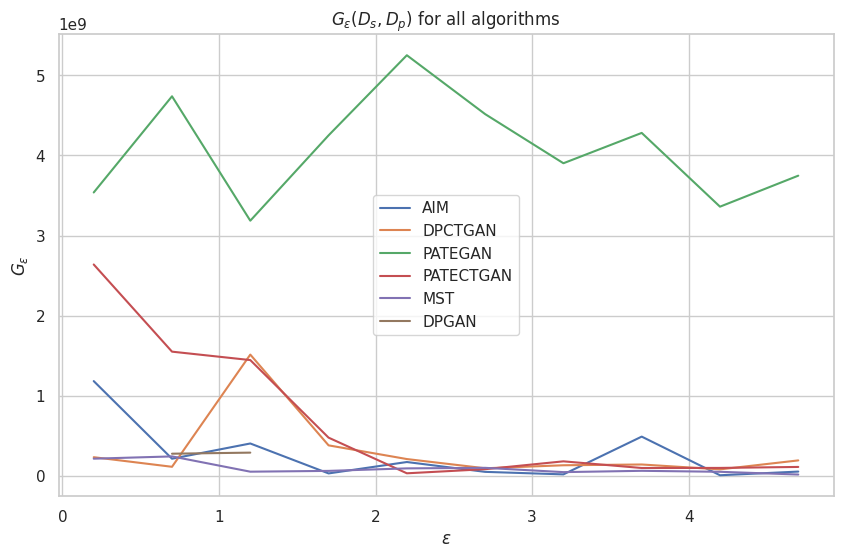

In [6]:
#Plotiign the results for gepsilon for every model
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.lineplot(data=pd_epsilon, dashes=False)
plt.title(r'$G_{\epsilon}(D_{s},D_{p})$ for all algorithms')
plt.xlabel(r'$\epsilon$')
plt.savefig("Project/DataSets/Data_Adult/Metrics_results/G_epsilon_private/gepsilon.png")
plt.ylabel(r'$G_{\epsilon}$')
plt.show()

#Make the plot in log scale
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.lineplot(data=pd_epsilon, dashes=False)
plt.yscale('log')
plt.title(r'$G_{\epsilon}(D_{s},D_{p})$ for all algorithms')
plt.xlabel(r'$\epsilon$')
plt.savefig("Project/DataSets/Data_Adult/Metrics_results/G_epsilon_private/gepsilon_log.png")
plt.ylabel(r'$\log{G_{\epsilon}}$')
plt.show()

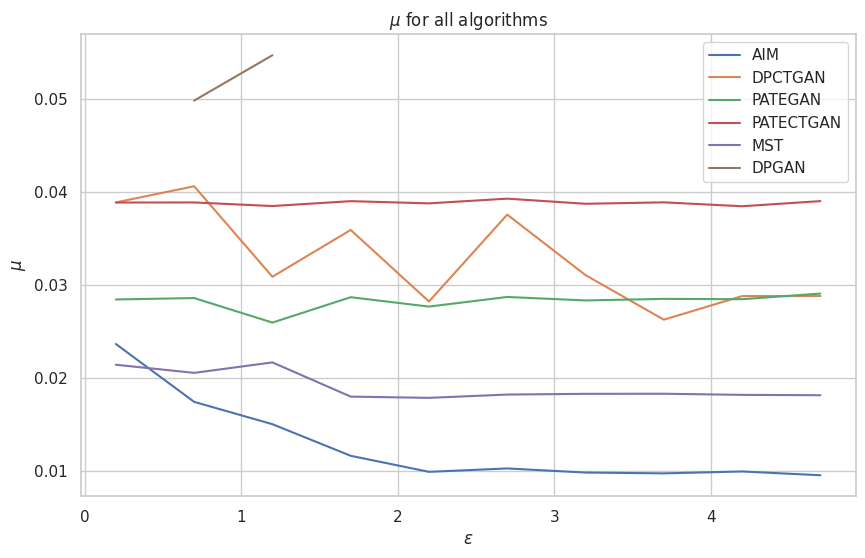

In [7]:
#Make of the another for mu
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.lineplot(data=pd_mu, dashes=False)
plt.title(r'$\mu$ for all algorithms')
plt.xlabel(r'$\epsilon$')
plt.savefig("Project/DataSets/Data_Adult/Metrics_results/G_epsilon_private/mu.png")
plt.ylabel(r'$\mu$')
plt.show()

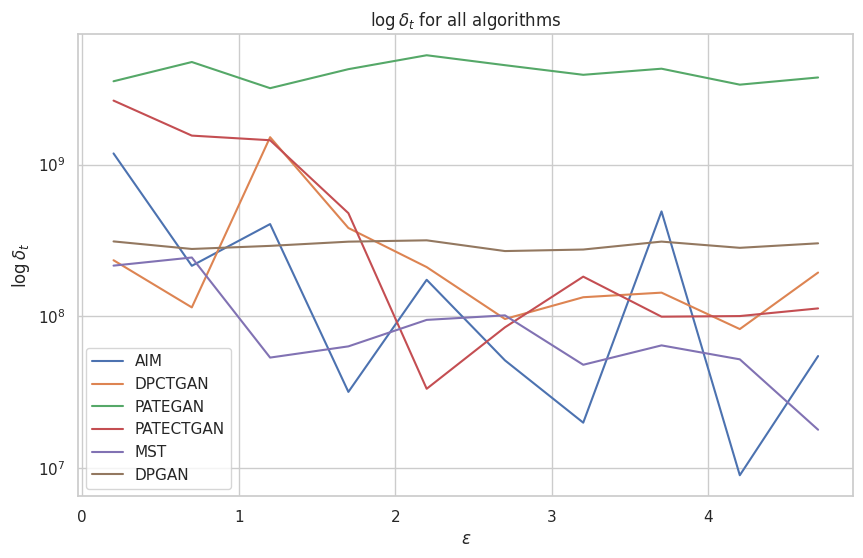

In [8]:
#Make another plot for deltas
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.lineplot(data=pd_delta_c, dashes=False)
plt.title(r'$\delta _{c}$ for all algorithms')
plt.xlabel(r'$\epsilon$')
plt.savefig("Project/DataSets/Data_Adult/Metrics_results/G_epsilon_private/delta_c.png")
plt.ylabel(r'$\delta_{c}$')
plt.show()

plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.lineplot(data=pd_delta_r, dashes=False)
plt.title(r'$\delta _{r}$ for all algorithms')
plt.xlabel(r'$\epsilon$')
plt.savefig("Project/DataSets/Data_Adult/Metrics_results/G_epsilon_private/delta_r.png")
plt.ylabel(r'$\delta_{r}$')
plt.show()

plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.lineplot(data=pd_delta_t, dashes=False)
plt.title(r'$\delta _{t}$ for all algorithms')
plt.xlabel(r'$\epsilon$')
plt.savefig("Project/DataSets/Data_Adult/Metrics_results/G_epsilon_private/delta_t.png")
plt.ylabel(r'$\delta_{t}$')
plt.show()

plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.lineplot(data=pd_delta_r, dashes=False)
plt.title(r'$\log{\delta _{r}}$ for all algorithms')
plt.yscale('log')
plt.xlabel(r'$\epsilon$')
plt.savefig("Project/DataSets/Data_Adult/Metrics_results/G_epsilon_private/log_delta_r.png")
plt.ylabel(r'$\log{\delta_{r}}$')
plt.show()

plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.lineplot(data=pd_delta_t, dashes=False)
plt.title(r'$\log{\delta _{t}}$ for all algorithms')
plt.yscale('log')
plt.xlabel(r'$\epsilon$')
plt.savefig("Project/DataSets/Data_Adult/Metrics_results/G_epsilon_private/log_delta_t.png")
plt.ylabel(r'$\log{\delta_{t}}$')
plt.show()

### Metrics for non.private models

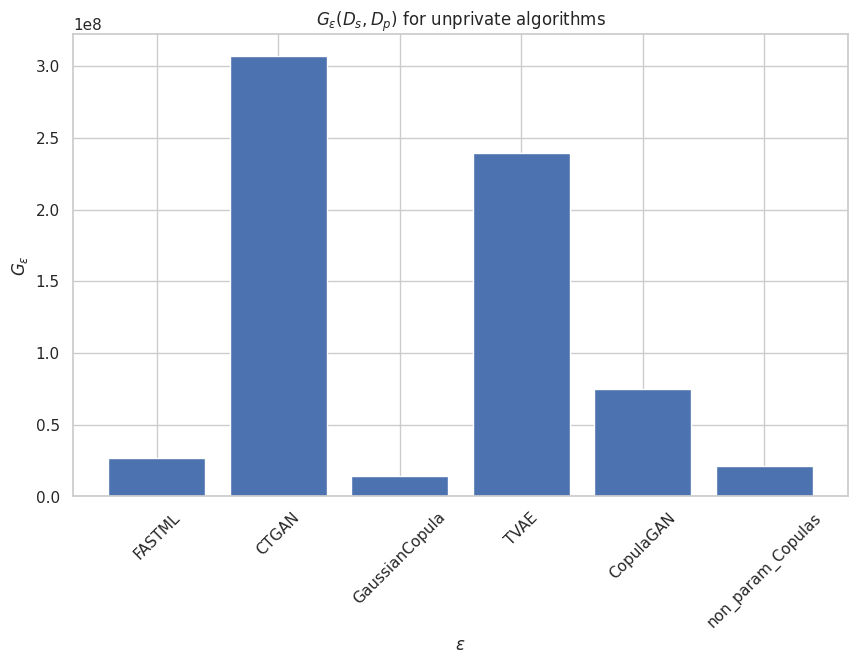

In [30]:
#Reading g-epsilon from a json
with open("Project/DataSets/Data_Adult/Metrics_results/G_epsilon_unprivate/results_gepsilon.json") as f:
    g_epsilon = json.load(f)

#Making a barplot using the g_epsilon values
plt.figure(figsize=(10,6))
plt.bar(g_epsilon.keys(),g_epsilon.values())
plt.title(r'$G_{\epsilon}(D_{s},D_{p})$ for unprivate algorithms')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$G_{\epsilon}$')
plt.xticks(rotation=45)
plt.savefig("Project/DataSets/Data_Adult/Metrics_results/G_epsilon_unprivate/gepsilon.png")
plt.show()

In [31]:
#Using the same data, we are going to make a barplot in log scale
plt.figure(figsize=(10,6))
plt.bar(g_epsilon.keys(),g_epsilon.values())
plt.yscale('log')
plt.title(r'$G_{\epsilon}(D_{s},D_{p})$ for unprivate algorithms')
plt.ylabel(r'$\log{G_{\epsilon}}$')
plt.xticks(rotation=45)
plt.savefig("Project/DataSets/Data_Adult/Metrics_results/G_epsilon_unprivate/gepsilon_log.png")
plt.show()

### Making visualizer for G_eps bands

In [5]:
# Importing dfs from every model, for every k from 0 to 9
k=np.arange(0,10)


def load_metrics(samples_folder,k):
    metrics = {}
    for filename in filenames:
        with open(f"hpc_workload/Gepsilon/results/general_bands/{k}/{samples_folder}/results_{filename}.json") as f:
            metrics[filename] = json.load(f)
    return metrics

# Define the filenames
filenames = [
    "delta_c",
    "delta_r",
    "delta_t",
    "gepsilon",
    "mu"
]

bands_delta_c={}
bands_delta_r={}
bands_delta_t={}
bands_gepsilon={}
bands_mu={}

for i in k:
    metrics_aim = load_metrics("AIM",i)
    metrics_dpctgan = load_metrics("DPCTGAN",i)
    metrics_pategan = load_metrics("PATEGAN",i)
    metrics_patctgan = load_metrics("PATECTGAN",i)
    metrics_mst = load_metrics("MST",i)
    pd_epsilon = pd.DataFrame()
    pd_mu = pd.DataFrame()
    pd_delta_c = pd.DataFrame()
    pd_delta_r = pd.DataFrame()
    pd_delta_t = pd.DataFrame()
    for key in filenames:
        if key == 'gepsilon':
            pd_epsilon['AIM'] = np.array(list(metrics_aim[key].values()))
            pd_epsilon['DPCTGAN'] =np.array(list( metrics_dpctgan[key].values()))
            pd_epsilon['PATEGAN'] = np.array(list(metrics_pategan[key].values()))
            pd_epsilon['PATECTGAN'] = np.array(list(metrics_patctgan[key].values()))
            pd_epsilon['MST'] = np.array(list(metrics_mst[key].values()))
        elif key == 'mu':
            pd_mu['AIM'] = np.array(list(metrics_aim[key].values()))
            pd_mu['DPCTGAN'] =np.array(list( metrics_dpctgan[key].values()))
            pd_mu['PATEGAN'] = np.array(list(metrics_pategan[key].values()))
            pd_mu['PATECTGAN'] = np.array(list(metrics_patctgan[key].values()))
            pd_mu['MST'] = np.array(list(metrics_mst[key].values()))
        elif key == 'delta_c':
            pd_delta_c['AIM'] = np.array(list(metrics_aim[key].values()))
            pd_delta_c['DPCTGAN'] =np.array( list(metrics_dpctgan[key].values()))
            pd_delta_c['PATEGAN'] = np.array(list(metrics_pategan[key].values()))
            pd_delta_c['PATECTGAN'] = np.array(list(metrics_patctgan[key].values()))
            pd_delta_c['MST'] = np.array(list(metrics_mst[key].values()))
        elif key == 'delta_r':
            pd_delta_r['AIM'] = np.array(list(metrics_aim[key].values()))
            pd_delta_r['DPCTGAN'] =np.array( list(metrics_dpctgan[key].values()))
            pd_delta_r['PATEGAN'] = np.array(list(metrics_pategan[key].values()))
            pd_delta_r['PATECTGAN'] = np.array(list(metrics_patctgan[key].values()))
            pd_delta_r['MST'] = np.array(list(metrics_mst[key].values()))
        elif key == 'delta_t':
            pd_delta_t['AIM'] = np.array(list(metrics_aim[key].values()))
            pd_delta_t['DPCTGAN'] =np.array( list(metrics_dpctgan[key].values()))
            pd_delta_t['PATEGAN'] = np.array(list(metrics_pategan[key].values()))
            pd_delta_t['PATECTGAN'] = np.array(list(metrics_patctgan[key].values()))
            pd_delta_t['MST'] = np.array(list(metrics_mst[key].values()))
    #Getting the epsilon values
    epsilons=list(load_metrics("AIM",0)['delta_t'].keys())
    float_epsilons = [float(x) for x in epsilons]
    
    pd_epsilon.index=epsilons
    pd_epsilon.index.name='epsilon'
    pd_mu.index=epsilons
    pd_mu.index.name='epsilon'
    pd_delta_c.index=epsilons
    pd_delta_c.index.name='epsilon'
    pd_delta_r.index=epsilons
    pd_delta_r.index.name='epsilon'
    pd_delta_t.index=epsilons
    pd_delta_t.index.name='epsilon'
    
    #Sort the dataframes by the value of epsilon
    pd_epsilon=pd_epsilon.sort_index()
    pd_mu=pd_mu.sort_index()
    pd_delta_c=pd_delta_c.sort_index()
    pd_delta_r=pd_delta_r.sort_index()
    pd_delta_t=pd_delta_t.sort_index()

       
    bands_delta_c[i]=pd_delta_c
    bands_delta_r[i]=pd_delta_r
    bands_delta_t[i]=pd_delta_t
    bands_gepsilon[i]=pd_epsilon
    bands_mu[i]=pd_mu

#Build a 3D matrix for every metric. 
#The first dimention is the value of epsilon, the second dimention the model, and the third the value of k.

delta_c=np.zeros((len(epsilons),5,10))
delta_r=np.zeros((len(epsilons),5,10))
delta_t=np.zeros((len(epsilons),5,10))
gepsilon=np.zeros((len(epsilons),5,10))
mu=np.zeros((len(epsilons),5,10))

for i in k:
    delta_c[:,:,i]=bands_delta_c[i].values
    delta_r[:,:,i]=bands_delta_r[i].values
    delta_t[:,:,i]=bands_delta_t[i].values
    gepsilon[:,:,i]=bands_gepsilon[i].values
    mu[:,:,i]=bands_mu[i].values

In [46]:
def plot_from_3D(data,metric):
    models=['AIM','DPCTGAN','PATEGAN','PATECTGAN','MST']
    epsilons=[0.2,0.7,1.2,1.7,2.2,2.7,3.2,3.7,4.2,4.7]
    # Calculate mean and standard error for each i
    mean_values = np.mean(data, axis=2)
    std_err_values = stats.sem(data, axis=2)
    
    # Calculate 95% confidence interval for each i
    confidence_intervals = [stats.t.interval(0.95, data.shape[1] - 1, loc=mean_values[:, i], scale=std_err_values[:, i]) for i in range(data.shape[1])]

    # Extract upper and lower bounds for each i
    lower_bounds = [ci[0] for ci in confidence_intervals]
    upper_bounds = [ci[1] for ci in confidence_intervals]
    
    # Plot mean lines and fill between upper and lower bounds for each i
    for i in range(data.shape[1]):
        plt.plot(np.arange(len(mean_values[:, i])), mean_values[:, i], marker='o', label=models[i])
        plt.fill_between(np.arange(len(mean_values[:, i])), lower_bounds[i], upper_bounds[i], alpha=0.4)
        
    plt.xlabel(r'$\epsilon$')
    plt.xticks(np.arange(len(mean_values[:, 0])), epsilons)
    plt.ylabel(metric)
    plt.title(f'{metric} and 95% Confidence Interval')
    plt.legend(loc='upper right')
    plt.show()   

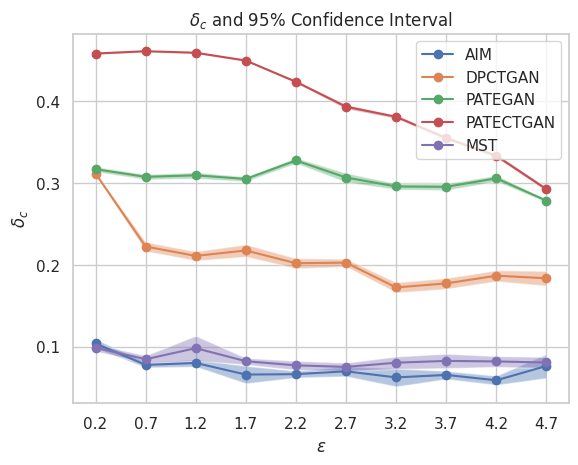

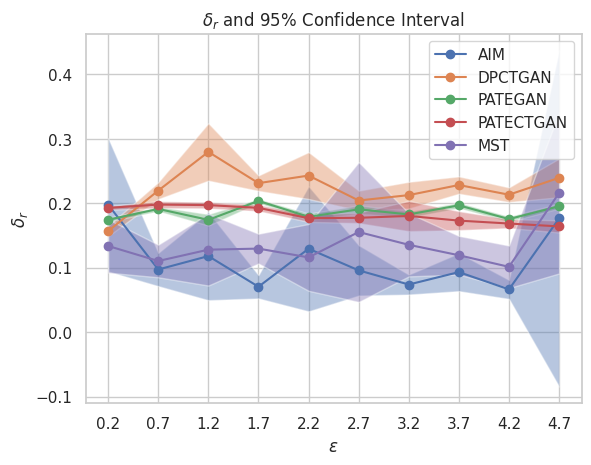

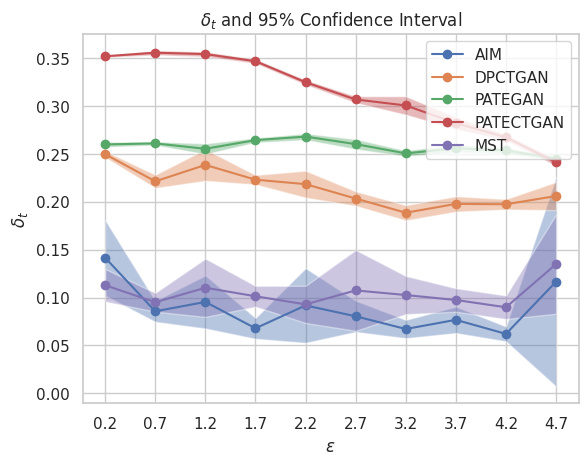

In [48]:
plot_from_3D(mu,r'$\mu$')
plot_from_3D(gepsilon,r'$G_{\epsilon}$')
plot_from_3D(delta_c,r'$\delta_{c}$')
plot_from_3D(delta_r,r'$\delta_{r}$')
plot_from_3D(delta_t,r'$\delta_{t}$')